In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
% matplotlib inline
data = pd.read_csv('MunicipiosBrasil.csv')

In [2]:
data.head()

,ID,LATITUDE,LONGITUDE,Mun/UF,MUNICIPIO,UF,Valor
0,1,-9.82,-66.88,ACRELANDIA - AC,ACRELANDIA,AC,39560.03891
1,2,-10.94,-69.56,ASSIS BRASIL - AC,ASSIS BRASIL,AC,17842.15099
2,3,-11.01,-68.74,BRASILEIA - AC,BRASILEIA,AC,93373.39431
3,4,-9.83,-67.95,BUJARI - AC,BUJARI,AC,28516.56749
4,5,-10.57,-67.67,CAPIXABA - AC,CAPIXABA,AC,18886.45514


In [3]:
data.loc[1, 'MUNICIPIO']

'ASSIS BRASIL'

In [4]:
data.set_index(["MUNICIPIO"], inplace=True)
data.head()

,ID,LATITUDE,LONGITUDE,Mun/UF,UF,Valor
MUNICIPIO,,,,,,
ACRELANDIA,1,-9.82,-66.88,ACRELANDIA - AC,AC,39560.03891
ASSIS BRASIL,2,-10.94,-69.56,ASSIS BRASIL - AC,AC,17842.15099
BRASILEIA,3,-11.01,-68.74,BRASILEIA - AC,AC,93373.39431
BUJARI,4,-9.83,-67.95,BUJARI - AC,AC,28516.56749
CAPIXABA,5,-10.57,-67.67,CAPIXABA - AC,AC,18886.45514


In [5]:
data.loc["ACRELANDIA"]

ID                         1
LATITUDE               -9.82
LONGITUDE             -66.88
Mun/UF       ACRELANDIA - AC
UF                        AC
Valor                  39560
Name: ACRELANDIA, dtype: object

In [6]:
data.loc["ACRELANDIA"].LONGITUDE

-66.88

In [9]:
data.loc['BRASILIA']

ID                     801
LATITUDE            -15.78
LONGITUDE           -47.93
Mun/UF       BRASILIA - DF
UF                      DF
Valor          1.82195e+06
Name: BRASILIA, dtype: object

In [3]:
from math import radians, cos, sin, asin, sqrt
def haversine2(orig, dest):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    orig.LONGITUDE, orig.LATITUDE, dest.LONGITUDE, dest.LATITUDE = map(radians, [orig.LONGITUDE, orig.LATITUDE, dest.LONGITUDE, dest.LATITUDE])

    # haversine formula 
    dlon = dest.LONGITUDE - orig.LONGITUDE 
    dlat = dest.LATITUDE - orig.LATITUDE 
    a = sin(dlat/2)**2 + cos(orig.LATITUDE) * cos(dest.LATITUDE) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r *1.35

In [12]:
haversine2(data.loc['SOBRAL'], data.loc['BRASILIA'])

/home/igor/.local/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


2133.4924411689212

In [13]:
# lista = []
# for municipios in data['MUNICIPIO']:
#     lista.append()
haversine2(data.loc['ACRELANDIA'], data.loc['BRASILIA'])

/home/igor/.local/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


2912.687050890211

In [26]:
df = haversine2(data.loc['ACRELANDIA'], data.loc['BRASILIA'])
round(df,2)

/home/igor/.local/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


2912.69

In [12]:
data.loc[(data["MUNICIPIO"]=="BRASILIA")]

,ID,LATITUDE,LONGITUDE,Mun/UF,MUNICIPIO,UF,Valor
800,801,-15.78,-47.93,BRASILIA - DF,BRASILIA,DF,1821946.0


In [9]:
df = len(data)
df

5509

In [10]:
data.loc[800]

ID                     801
LATITUDE            -15.78
LONGITUDE           -47.93
Mun/UF       BRASILIA - DF
MUNICIPIO         BRASILIA
UF                      DF
Valor          1.82195e+06
Name: 800, dtype: object

In [16]:
df = haversine2(data.loc[0], data.loc[800])
df

/home/igor/.local/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


2912.687050890211

In [4]:
dataf = pd.read_csv('distancia.csv')

In [10]:
haversine2(data.loc[0], data.loc[11])

/home/igor/.local/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


885.1990663942918

In [5]:
df = nx.from_pandas_edgelist(dataf, source='Origem', target='Destino', edge_attr=True)

In [6]:
df.nodes()

NodeView(('ACRELANDIA', 'ASSIS BRASIL', 'BRASILEIA', 'BUJARI', 'CAPIXABA', 'CRUZEIRO DO SUL', 'EPITACIOLANDIA', 'FEIJO', 'JORDAO', 'MANCIO LIMA', 'MANOEL URBANO', 'MARECHAL THAUMATURGO', 'PLACIDO DE CASTRO', 'PORTO ACRE', 'PORTO WALTER', 'RIO BRANCO', 'RODRIGUES ALVES', 'SANTA ROSA DO PURUS', 'SENA MADUREIRA', 'SENADOR GUIOMARD', 'TARAUACA', 'XAPURI', 'AGUA BRANCA', 'ANADIA', 'ARAPIRACA', 'ATALAIA', 'BARRA DE SANTO ANTONIO', 'BARRA DE SAO MIGUEL', 'BATALHA', 'BELEM', 'BELO MONTE', 'BOCA DA MATA', 'BRANQUINHA', 'CACIMBINHAS', 'CAJUEIRO', 'CAMPESTRE', 'CAMPO ALEGRE', 'CAMPO GRANDE', 'CANAPI', 'CAPELA', 'CARNEIROS', 'CHA PRETA', 'COITE DO NOIA', 'COLONIA LEOPOLDINA', 'COQUEIRO SECO', 'CORURIPE', 'CRAIBAS', 'DELMIRO GOUVEIA', 'DOIS RIACHOS', 'ESTRELA DE ALAGOAS', 'FEIRA GRANDE', 'FELIZ DESERTO', 'FLEXEIRAS', 'GIRAU DO PONCIANO', 'IBATEGUARA', 'IGACI', 'IGREJA NOVA', 'INHAPI', 'JACARE DOS HOMENS', 'JACUIPE', 'JAPARATINGA', 'JARAMATAIA', 'JOAQUIM GOMES', 'JUNDIA', 'JUNQUEIRO', 'LAGOA DA CANO

In [7]:
df.edges()

EdgeView([('ACRELANDIA', 'ACRELANDIA'), ('ACRELANDIA', 'ASSIS BRASIL'), ('ACRELANDIA', 'BRASILEIA'), ('ACRELANDIA', 'BUJARI'), ('ACRELANDIA', 'CAPIXABA'), ('ACRELANDIA', 'CRUZEIRO DO SUL'), ('ACRELANDIA', 'EPITACIOLANDIA'), ('ACRELANDIA', 'FEIJO'), ('ACRELANDIA', 'JORDAO'), ('ACRELANDIA', 'MANCIO LIMA'), ('ACRELANDIA', 'MANOEL URBANO'), ('ACRELANDIA', 'MARECHAL THAUMATURGO'), ('ACRELANDIA', 'PLACIDO DE CASTRO'), ('ACRELANDIA', 'PORTO ACRE'), ('ACRELANDIA', 'PORTO WALTER'), ('ACRELANDIA', 'RIO BRANCO'), ('ACRELANDIA', 'RODRIGUES ALVES'), ('ACRELANDIA', 'SANTA ROSA DO PURUS'), ('ACRELANDIA', 'SENA MADUREIRA'), ('ACRELANDIA', 'SENADOR GUIOMARD'), ('ACRELANDIA', 'TARAUACA'), ('ACRELANDIA', 'XAPURI'), ('ACRELANDIA', 'AGUA BRANCA'), ('ACRELANDIA', 'ANADIA'), ('ACRELANDIA', 'ARAPIRACA'), ('ACRELANDIA', 'ATALAIA'), ('ACRELANDIA', 'BARRA DE SANTO ANTONIO'), ('ACRELANDIA', 'BARRA DE SAO MIGUEL'), ('ACRELANDIA', 'BATALHA'), ('ACRELANDIA', 'BELEM'), ('ACRELANDIA', 'BELO MONTE'), ('ACRELANDIA', 'BO

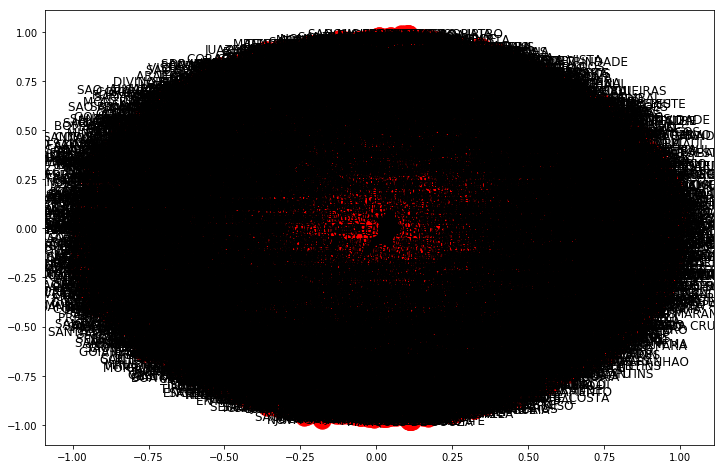

In [18]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.figure(figsize=(12,8))
nx.draw_networkx(df, with_labels=True)

In [9]:
df['ACRELANDIA']['BRASILIA']

{'Origem': 'ACRELANDIA', 'Destino': 'BRASILIA', 'Distancia': 2912.687050890211}

In [25]:
shortest_path_distance

['ACRELANDIA', 'BRASILIA']

In [15]:
df.edges('BRASILIA')

EdgeDataView([('BRASILIA', 'ACRELANDIA')])

In [21]:
data.loc[(data["Mun/UF"]=="RIO BRANCO - AC")]

,ID,LATITUDE,LONGITUDE,Mun/UF,MUNICIPIO,UF,Valor
15,16,-9.97,-67.81,RIO BRANCO - AC,RIO BRANCO,AC,1476048.62


In [22]:
data.loc[(data["Mun/UF"]=="MACEIO - AL")]

,ID,LATITUDE,LONGITUDE,Mun/UF,MUNICIPIO,UF,Valor
67,68,-9.66,-35.73,MACEIO - AL,MACEIO,AL,723230.0


In [24]:
type(data.loc[(data["Mun/UF"]=="MACAPA - AP")])

pandas.core.frame.DataFrame

In [34]:
lista = ['RIO BRANCO - AC',
'MACEIO - AL',
'MACAPA - AP',
'MANAUS - AM',
'SALVADOR - BA',
'FORTALEZA - CE',
'BRASILIA - DF',
'VITORIA - ES',
'GOIANIA - GO',
'SAO LUIS - MA',
'CUIABA - MT',
'CAMPO GRANDE - MS',
'BELO HORIZONTE - MG',
'BELEM - PA',
'JOAO PESSOA - PB',
'CURITIBA - PR',
'RECIFE - PE',
'TERESINA - PI',
'RIO DE JANEIRO - RJ',
'NATAL - RN',
'PORTO ALEGRE - RS',
'PORTO VELHO - RO',
'BOA VISTA - RR',
'FLORIANOPOLIS - SC',
'SAO PAULO - SP',
'ARACAJU - SE',
'PALMAS - TO'
]

In [61]:
capitais = pd.DataFrame([], columns=data.columns)
capitais

,ID,LATITUDE,LONGITUDE,Mun/UF,MUNICIPIO,UF,Valor


In [72]:
for i in range(0,26):
    df2 = data.loc[(data["Mun/UF"]==lista[i])]
#     print(df2)
#     capitais.loc[i] = df2
    capitais = capitais.append(df2,ignore_index=True)
capitais.head(78)


,ID,LATITUDE,LONGITUDE,Mun/UF,MUNICIPIO,UF,Valor
0,16,-9.97,-67.81,RIO BRANCO - AC,RIO BRANCO,AC,1476048.620
1,68,-9.66,-35.73,MACEIO - AL,MACEIO,AL,723230.000
2,192,0.03,-51.06,MACAPA - AP,MACAPA,AP,1538101.145
3,161,-3.10,-60.02,MANAUS - AM,MANAUS,AM,1157357.000
4,535,-12.97,-38.51,SALVADOR - BA,SALVADOR,BA,2211539.000
5,675,-3.71,-38.54,FORTALEZA - CE,FORTALEZA,CE,1965513.000
6,801,-15.78,-47.93,BRASILIA - DF,BRASILIA,DF,1821946.000
7,878,-20.31,-40.33,VITORIA - ES,VITORIA,ES,1649950.665
8,971,-16.67,-49.25,GOIANIA - GO,GOIANIA,GO,1002377.000
9,1306,-2.53,-44.30,SAO LUIS - MA,SAO LUIS,MA,780833.000


In [73]:
matriz_mult = []
quant_linhas = len(capitais) # Conta quantas linhas existem
# quant_colunas = len(matriz[0]) # Conta quantos elementos têm em uma linha
for i in range(0,26):
    for j in range(0,26):
        matriz_mult.append([])
        mult = haversine2(capitais.loc[i], capitais.loc[j])
        matriz_mult[j].append(mult)
    print(i)

/home/igor/.local/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [305]:
# matriz_mult

In [78]:
lista2 = []
k = 0
for i in range(0,26):
    for j in range(0,26):
        k = k+j
        lista2.append(lista[i])

In [81]:
lista3 = []
for i in range(0,26):
    for j in range(0,26):
        
        lista3.append(lista[j])

In [84]:
lista4 = []
for i in range(0,26):
    for j in range(0,26):
        lista4.append(matriz_mult[i][j])

In [115]:
estrutura = {'Origem':lista2,'Destino':lista3, 'Distancia':lista4}
df3 = pd.DataFrame(data=estrutura)

In [127]:
df3

,Origem,Destino,Distancia
0,RIO BRANCO - AC,RIO BRANCO - AC,0.000000
1,RIO BRANCO - AC,MACEIO - AL,4743.509437
2,RIO BRANCO - AC,MACAPA - AP,2917.441912
3,RIO BRANCO - AC,MANAUS - AM,1552.921408
4,RIO BRANCO - AC,SALVADOR - BA,4331.489328
5,RIO BRANCO - AC,FORTALEZA - CE,4459.700619
6,RIO BRANCO - AC,BRASILIA - DF,3035.053470
7,RIO BRANCO - AC,VITORIA - ES,4265.093827
8,RIO BRANCO - AC,GOIANIA - GO,2889.399357
9,RIO BRANCO - AC,SAO LUIS - MA,3678.944755


In [179]:
# df3.head()
df4 = pd.DataFrame([],columns=['Origem', 'Destino', 'Distancia'])
for i in range(0,676):
    if(i % 3 == 0):
        df4 = df4.append(df3.loc[[i]],ignore_index=True)

for i in range(0,len(df4)):
    if(i % 2 != 0):
        df4 = df4.append(df3.loc[[i]],ignore_index=True)

In [180]:
df4

,Origem,Destino,Distancia
0,RIO BRANCO - AC,RIO BRANCO - AC,0.000000
1,RIO BRANCO - AC,MANAUS - AM,1552.921408
2,RIO BRANCO - AC,BRASILIA - DF,3035.053470
3,RIO BRANCO - AC,SAO LUIS - MA,3678.944755
4,RIO BRANCO - AC,BELO HORIZONTE - MG,3757.111489
5,RIO BRANCO - AC,CURITIBA - PR,3513.883654
6,RIO BRANCO - AC,RIO DE JANEIRO - RJ,4029.805080
7,RIO BRANCO - AC,PORTO VELHO - RO,606.922101
8,RIO BRANCO - AC,SAO PAULO - SP,3654.279408
9,MACEIO - AL,MACEIO - AL,0.000000


In [181]:
dijk = nx.from_pandas_edgelist(df4, source='Origem', target='Destino', edge_attr=True)

In [182]:
dijk.nodes()

NodeView(('RIO BRANCO - AC', 'MANAUS - AM', 'BRASILIA - DF', 'SAO LUIS - MA', 'BELO HORIZONTE - MG', 'CURITIBA - PR', 'RIO DE JANEIRO - RJ', 'PORTO VELHO - RO', 'SAO PAULO - SP', 'MACEIO - AL', 'SALVADOR - BA', 'VITORIA - ES', 'CUIABA - MT', 'BELEM - PA', 'RECIFE - PE', 'NATAL - RN', 'BOA VISTA - RR', 'ARACAJU - SE', 'MACAPA - AP', 'FORTALEZA - CE', 'GOIANIA - GO', 'CAMPO GRANDE - MS', 'JOAO PESSOA - PB', 'TERESINA - PI', 'PORTO ALEGRE - RS', 'FLORIANOPOLIS - SC'))

In [183]:
dijk.edges()

EdgeView([('RIO BRANCO - AC', 'RIO BRANCO - AC'), ('RIO BRANCO - AC', 'MANAUS - AM'), ('RIO BRANCO - AC', 'BRASILIA - DF'), ('RIO BRANCO - AC', 'SAO LUIS - MA'), ('RIO BRANCO - AC', 'BELO HORIZONTE - MG'), ('RIO BRANCO - AC', 'CURITIBA - PR'), ('RIO BRANCO - AC', 'RIO DE JANEIRO - RJ'), ('RIO BRANCO - AC', 'PORTO VELHO - RO'), ('RIO BRANCO - AC', 'SAO PAULO - SP'), ('RIO BRANCO - AC', 'MACEIO - AL'), ('RIO BRANCO - AC', 'FORTALEZA - CE'), ('RIO BRANCO - AC', 'VITORIA - ES'), ('RIO BRANCO - AC', 'CAMPO GRANDE - MS'), ('RIO BRANCO - AC', 'BELEM - PA'), ('RIO BRANCO - AC', 'TERESINA - PI'), ('RIO BRANCO - AC', 'NATAL - RN'), ('RIO BRANCO - AC', 'FLORIANOPOLIS - SC'), ('RIO BRANCO - AC', 'ARACAJU - SE'), ('MANAUS - AM', 'MANAUS - AM'), ('MANAUS - AM', 'BRASILIA - DF'), ('MANAUS - AM', 'SAO LUIS - MA'), ('MANAUS - AM', 'BELO HORIZONTE - MG'), ('MANAUS - AM', 'CURITIBA - PR'), ('MANAUS - AM', 'RIO DE JANEIRO - RJ'), ('MANAUS - AM', 'PORTO VELHO - RO'), ('MANAUS - AM', 'SAO PAULO - SP'), ('MA

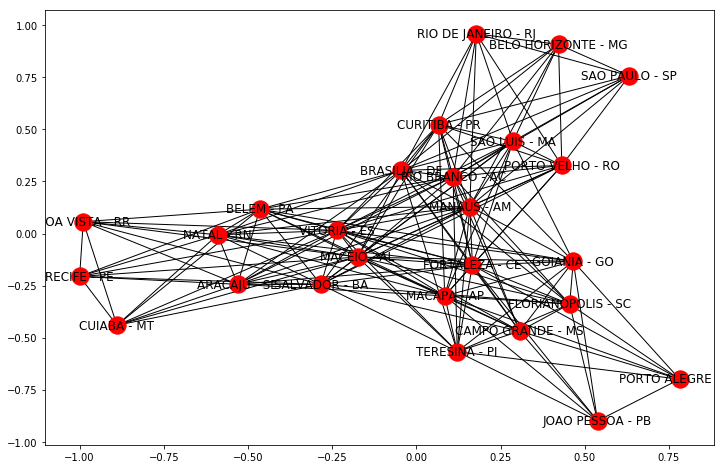

In [275]:
plt.figure(figsize=(12,8))
nx.draw_networkx(dijk, with_labels=True)

In [185]:
shortest_path_distance = nx.dijkstra_path(dijk, source='SAO PAULO - SP', target='CUIABA - MT', weight='Distancia')

In [266]:
shortest_path_distance

['SAO PAULO - SP', 'CURITIBA - PR', 'VITORIA - ES', 'CUIABA - MT']

In [269]:
def plot_shortest_path(path):
    print(path)
    positions = nx.spring_layout(dijk)
    plt.figure(figsize=(12,8))
    nx.draw_networkx(dijk, pos=positions,
                node_color='lightblue',
                edge_color='gray',                
                width=1, with_labels=True, alpha=0.8
           )
    
    short_path=nx.DiGraph()
    for i in range(len(path)-1):
        short_path.add_edge(path[i], path[i+1])
    
    nx.draw_networkx(short_path, pos=positions,
                node_color='dodgerblue',
                edge_color='dodgerblue',
                width=3, with_labels=True
           )
    
    plt.show()

['SAO PAULO - SP', 'CURITIBA - PR', 'VITORIA - ES', 'CUIABA - MT']


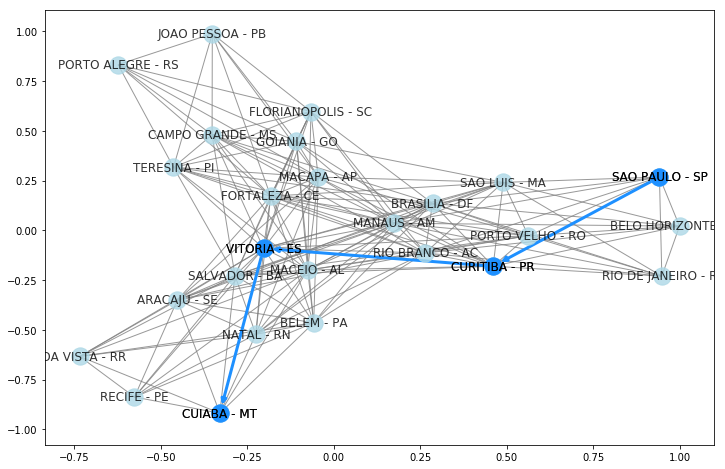

In [304]:
plot_shortest_path(shortest_path_distance)